
<h1 style="color:gray">Project: Investigate a Dataset from The Movie Database (TMDb) </h1>

<h2 style="color:gray">Table of Contents </h2>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
<h1 style="color:gray"> Introduction </h1>

<p style="color:black;font-size:17px"> The dataset I selected for my analysis describes the information regarding a set of movies. Some of the information described are the cast, genres, popularity, budget, revenue, and so on. 
My focus is going to be on the release time of movies, their genres, and if there is a positive relation between these two factors against the profit (revenue - budget) a movie makes. The questions I will be exploring are the following: <br>
    
    1. On which month are most movies released?
    2. Is the profit of a movie affected by the month it was released on?
    4. Are there genres that make a movie produce higher profit than others?
</p>

In [609]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
<h1 style="color:gray">  Data Wrangling <h1>
<h3 style="color:gray"> Exploring data: </h3>

In [610]:
mdata = pd.read_csv('tmdb-movies.csv')
mdata.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<p style="color:teal;font-size:17px"> On the cell above, we view the columns present in our database. There are some that are unneeded for our analysis which will be removed later. 
    Uneeded columns are:
    
         - id
         - imdb_id 
         - popularity
         - original title
         - cast
         - homepage 
         - director
         - tagline
         - keywords
         - overview
         - runtime
         - production_companies
         - vote_count
         - vote_average
         - release_year
         - budget_adj
         - revenue_adj
</p>

In [611]:
mdata.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<p style="color:teal;font-size:17px"> On the cell above, we see that we have zeros on important columns (budget, revenue) which need to be cleaned</p>

In [612]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<p style="color:teal;font-size:17px"> On the cell above, we look for missing values in our data. We find that one of our important columns (genres) has missing values, which needs to be cleaned.</p>

<h3 style="color:gray"> Structuring data: </h3>

<p style="color:teal;font-size:17px"> As is shown above, the only columns that we need to clean are: </p>

         - budget
         - revenue
         - genres
         
 
<p style="color:teal;font-size:17px"> Also, the release_date column needs to be cast to datetime since it is currently a string.
</p>

<p style="color:teal;font-size:17px"> Now we need to decide how we are going to deal with the zero values in the budget and revenue column. First we need to make sure that they are, indeed, unrealistic or inaccurate.</p>

In [613]:
mdata[mdata['budget'] == 0].head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07


In [614]:
mdata[mdata['budget'] == 0]['id'].count()

5696

In [615]:
mdata[mdata['revenue'] == 0]['id'].count()

6016

In [616]:
mdata[mdata['revenue'] == 0][mdata['budget'] == 0]['id'].count()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


4701

<p style="color:teal;font-size:17px"> The cells above shows that a movie called Mr. Holmes was created with 0 budget. However, a quick google search shows that it was created with a 10M$ budget. Also, we can see that more than 50% of the movies in our dataset have zeros in the budget and revenue. and about 40% of the movies have zeros in both the budget AND the revenue column. Therefore, they are definitely not realistic nor accurate values. </p>

<p style="color:teal;font-size:17px"> Filling both of these columns up with the mean of their values does not sound like the best choice since it will greately influence our outputs. So, we're going to drop the rows with the zero values.</p>

<p style="color:teal;font-size:17px"> Finally, we need to check for duplicated values. It is shown in the following cell that we have one duplicated row, which will need to be dropped. </p>

In [617]:
mdata.duplicated().sum()

1

<h2 style="color:gray;font-size:23px"> Data Cleaning: </h2>


<p style="color:teal;font-size:17px"> First thing we're going to do is drop unneeded columns:
</p>

In [618]:
mdata.drop(['id', 'imdb_id','popularity', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

<p style="color:teal;font-size:17px"> Next, we're going to deal with the zeros. </p>

In [619]:
# the rows with 0 values in the budget and revenue column will be replaced by null
mdata['budget'].replace(0, np.NAN, inplace=True)
mdata['revenue'].replace(0, np.NAN, inplace=True)


In [620]:
# replace 0 values back to null and drop them
mdata.dropna(inplace=True)

<p style="color:teal;font-size:17px">
Now, we need to convert the budget and revenue from float to int
</p>

In [621]:
mdata['budget'].astype(np.int64, inplace=True)
mdata['revenue'].astype(np.int64, inplace=True);

<p style="color:teal;font-size:17px"> Next, the duplicated value will be dropped:
</p>

In [622]:
mdata.drop_duplicates(inplace=True)

<p style="color:teal;font-size:17px"> Cast the release_date column to datetime:
</p>

In [623]:
mdata['release_date'] = pd.to_datetime(mdata['release_date'])

In [624]:
mdata.head()

,budget,revenue,genres,release_date
0,150000000.0,1.513529e+09,Action|Adventure|Science Fiction|Thriller,2015-06-09
1,150000000.0,3.784364e+08,Action|Adventure|Science Fiction|Thriller,2015-05-13
2,110000000.0,2.952382e+08,Adventure|Science Fiction|Thriller,2015-03-18
3,200000000.0,2.068178e+09,Action|Adventure|Science Fiction|Fantasy,2015-12-15
4,190000000.0,1.506249e+09,Action|Crime|Thriller,2015-04-01


<p style="color:teal;font-size:17px"> The genre column has multiple values, so we should separate them into different columns. </p> 

In [625]:
genres = (mdata['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genre_{x+1}"))

In [626]:
mdata.drop(columns='genres', inplace=True)
mdata = mdata.join(genres)

In [627]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 8 columns):
budget          3854 non-null float64
revenue         3854 non-null float64
release_date    3854 non-null datetime64[ns]
genre_1         3854 non-null object
genre_2         3205 non-null object
genre_3         2112 non-null object
genre_4         873 non-null object
genre_5         259 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 431.0+ KB


<p style="color:teal;font-size:17px"> Now for the extra columns we need to insert for our analysis. The first column we'll insert is the profit column. Which will be calculated by minusing the budget from the revenue. </p>

In [628]:
mdata.insert(2,'profit',mdata['revenue']-mdata['budget'])

<p style="color:teal;font-size:17px"> Second column we're going to need is a month column, which we're going to get from the release_date column. </p>

In [629]:
mdata['release_month'] = pd.DatetimeIndex(mdata['release_date']).month

In [630]:
mdata.head(4)

,budget,revenue,profit,release_date,genre_1,genre_2,genre_3,genre_4,genre_5,release_month
0,150000000.0,1.513529e+09,1.363529e+09,2015-06-09,Action,Adventure,Science Fiction,Thriller,None,6
1,150000000.0,3.784364e+08,2.284364e+08,2015-05-13,Action,Adventure,Science Fiction,Thriller,None,5
2,110000000.0,2.952382e+08,1.852382e+08,2015-03-18,Adventure,Science Fiction,Thriller,None,None,3
3,200000000.0,2.068178e+09,1.868178e+09,2015-12-15,Action,Adventure,Science Fiction,Fantasy,None,12


<p style="color:teal;font-size:17px"> We got what we needed from the release_date, budget, and revenue columns. Now that we dont need them anymore, we're going to drop them.</p>

In [631]:
mdata.drop(['budget', 'revenue', 'release_date'], axis=1, inplace=True)

In [632]:
mdata.head()

,profit,genre_1,genre_2,genre_3,genre_4,genre_5,release_month
0,1.363529e+09,Action,Adventure,Science Fiction,Thriller,None,6
1,2.284364e+08,Action,Adventure,Science Fiction,Thriller,None,5
2,1.852382e+08,Adventure,Science Fiction,Thriller,None,None,3
3,1.868178e+09,Action,Adventure,Science Fiction,Fantasy,None,12
4,1.316249e+09,Action,Crime,Thriller,None,None,4


<a id='eda'></a>
<h1 style="color:gray">  Exploratory Data Analysis </h1>


<h3 style="color:gray"> On which month are most movies released? </h3>

<p style="color:teal;font-size:15px"> The summer time seems like the best time to release movies, since everyone has free time to go to the cinema! However, are most movies really released during the summer? </p>

<p style="color:teal;font-size:15px"> First, we'll collect the unique data from the month column to get all the months in a year: </p>

In [633]:
months = mdata['release_month'].unique()

<p style="color:teal;font-size:15px"> Next, we'll count the amount of movies produced each month, then store the data in a list that we're gonna use to create a new DataFrame. </p>

In [634]:
releases = []
nOmovies = 0
for month in months:
    mnth = mdata[mdata['release_month'] == month]
    nOmovies = len(mnth.index)
    releases.append((month, nOmovies))
    

In [635]:
movies_per_month = pd.DataFrame(releases, columns=['release_month', 'number_of_movies'])


<p style="color:teal;font-size:15px"> Here, we sort the values based on the month column instead of the index: </p>

In [636]:
movies_per_month = movies_per_month.sort_values('release_month').reset_index().drop(['index'], axis=1)

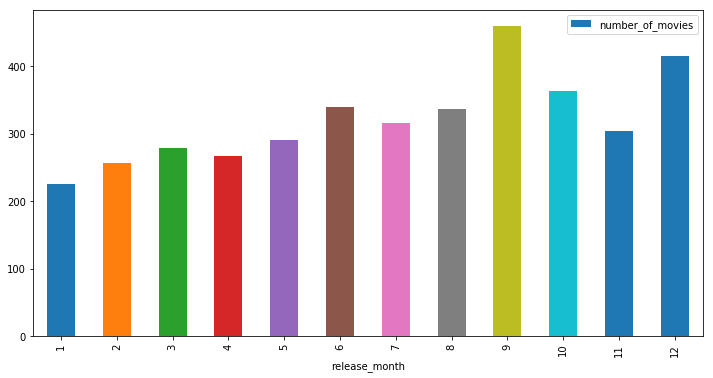

In [637]:
movies_per_month.plot(figsize=(12,6), x='release_month', y='number_of_movies',kind ='bar');

<p style="color:teal;font-size:15px"> On the figure above, we notice that most movies are surprisingly released on September. On the next figure, we'll collect the movies profits' and check the months they were released on to see if there is any correlation between the month a movie was released and the amount of profit it gains. </p>

<h3 style="color:gray"> Is the profit of a movie affected by the month it was released on? </h3>

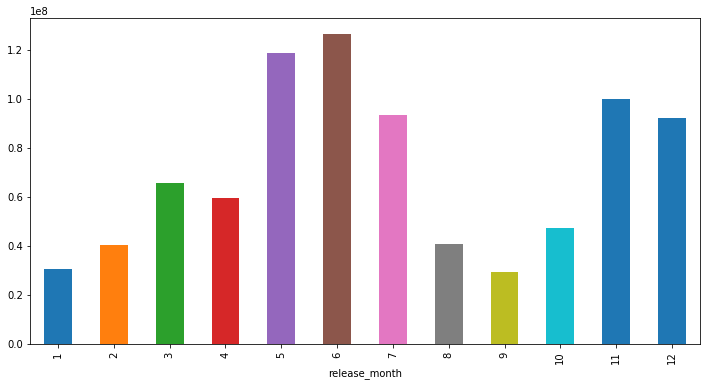

In [638]:
mdata.groupby('release_month')['profit'].mean().plot(figsize=(12,6), kind='bar');

<p style="color:teal;font-size:15px"> We notice that movies released during the beginning of summer (May, June) make the most profit! However, movies released during the end of summer (August) make so much less. Also, most movies are released during September as was shown in the first figure. However, they make the least profit compared with ones released during other months. Could it be related to the genres produced? </p>

 <h3 style="color:gray"> Are there genres that make a movie produce higher profit than others? </h3>

In [639]:
genres_all = genres.stack().unique()
genres_list = []
nOmovies = 0
profit = 0
    
for genre in genres_all:
    for x in range(1,6):
        num = str(x)
        gen = mdata[mdata['genre_'+num] == genre]
        profit = profit + int(gen['profit'].sum())
    if len(gen.index) != 0:
        genres_list.append((genre, profit))
    profit = 0
   

In [640]:
genrexprofit = pd.DataFrame(genres_list, columns = ['genre', 'profit'])

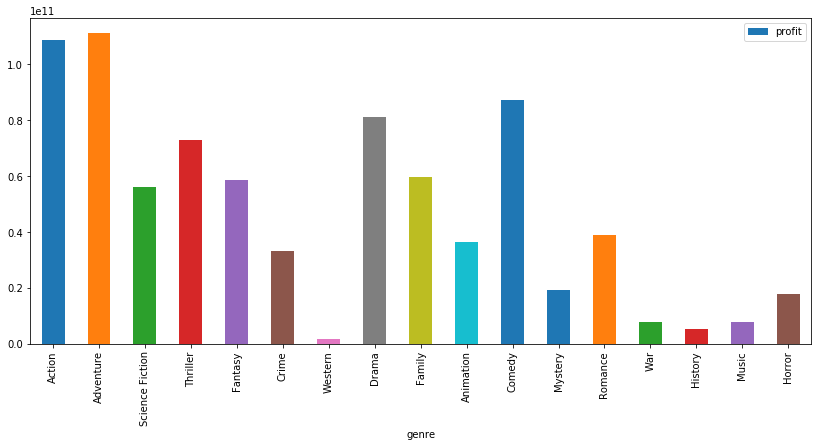

In [641]:
genrexprofit.plot(figsize=(14,6), x='genre', y='profit', kind='bar');

<p style="color:teal;font-size:15px"> The figure above shows that the genres generating the highest profits are Adventure and Action.

<p style="color:teal;font-size:15px"> Going back to our second question, we concluded that the release month with the highest profit is June, and the one with the least is September. So, we'll compare the genres produced during June vs the ones produced during September. </p>

In [642]:
def genres_in_month(month):
    df = mdata[mdata['release_month'] == month]
    genres = []
    nOmovies = 0
    for genre in genres_all:
        for x in range(1,6):
            num = str(x)
            gen = df[df['genre_'+num] == genre]
            nOmovies = nOmovies + len(gen.index)
        genres.append((genre, nOmovies))
        nOmovies = 0
    newdf = pd.DataFrame(genres, columns=['genre', 'number_of_movies'])
    return newdf.groupby('genre')['number_of_movies'].mean().plot(x='genre', y='number_of_movies', kind='bar', figsize=(14,6))

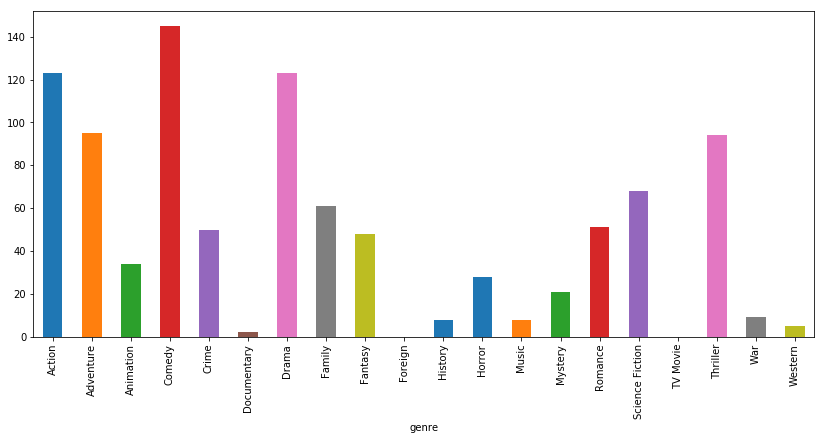

In [643]:
genres_in_month(6);

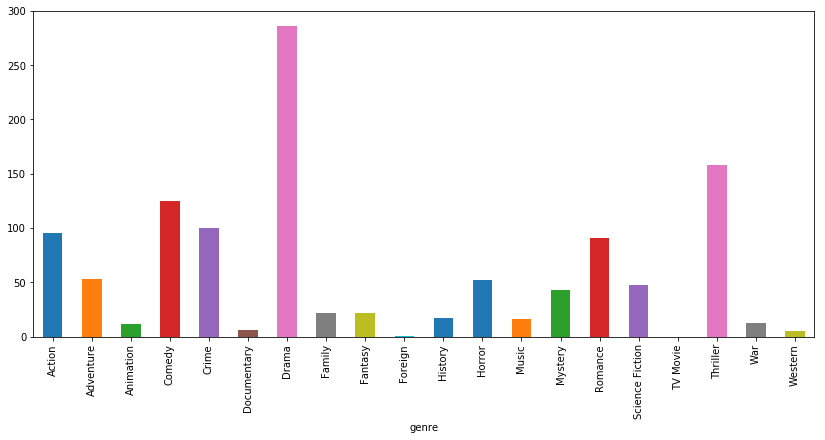

In [644]:
genres_in_month(9);

<p style="color:teal;font-size:15px"> Even though the most released genres during June are not Action & Adventure, they are still released more than during September.</p>

<a id='conclusions'></a>
<h1 style="color:gray">Conclusions </h1>
To conclude our analysis, we gather what we discovered from our dataset. The month with the most movie releases is September, but that does not make it a hot month for movies since movies released on September generated the least amount of profit. The month that generated the highest profit was June. To dive deep into possible reasons why September generates way less of a profit compared to June, we analyzed the genres that produce the most profit, then compared the genres produced during these two months. The genres that produced the highest profit were Adventure, Action, Comedy, and Drama. The genres released during June were mostly Comedy, Drama, and Action. As for September, the genres released were mostly Drama, Thriller, and Comedy. It seems there is a correlation between the profit a movie gains, the month it was released on, and it's genres. Since most successful movies are released on June, and two of the most profit-generating genres are also released on June. While September is when most movies with the least profit get released, and none of the highest profit-generating genres (Adventure and Action).

There were many limitations for me in this dataset. For one, The amout of zeros for the revenue and budget columns was unrealistically a lot, which makes me unsure if the outcomes are as accurate. Also, the genres column had multiple values which was not very easy to deal with.


<h1 style="color:gray">References: </h1>

1. https://nbviewer.jupyter.org/github/igorstojanovic91/udacity-investigate-a-dataset/blob/master/investigate-a-dataset-template.ipynb
2. https://nbviewer.jupyter.org/github/antra0497/Udacity--Project-Investigate-TMDB-Movies-Dataset/blob/master/investigate-a-dataset-template.ipynb
3. https://datatofish.com/create-pandas-dataframe/
4. https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas
5. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
6. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html



In [648]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0